     CNN Implementation for MNIST Digit Recognition


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix

Loading the MNIST dataset from TensorFlow

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Preprocessing the data

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

 Define the CNN architecture

In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

2024-05-01 22:39:03.705445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compiling the model

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 Print model summary and save architecture diagram

In [7]:
model.summary()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

Define K-Fold cross-validation with 5 folds

In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Lists to store evaluation metrics and histories


In [9]:
fold_accuracies = []
conf_matrices = []
histories = []

Perform K-Fold cross-validation

Fold 1:
Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1454 - accuracy: 0.9549 - val_loss: 0.0679 - val_accuracy: 0.9799
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0344 - val_accuracy: 0.9899
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0363 - val_accuracy: 0.9904
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0373 - val_accuracy: 0.9900
Validation Loss: 0.0373, Validation Accuracy: 0.9900
375/375 [==============================] - 1s 3ms/step


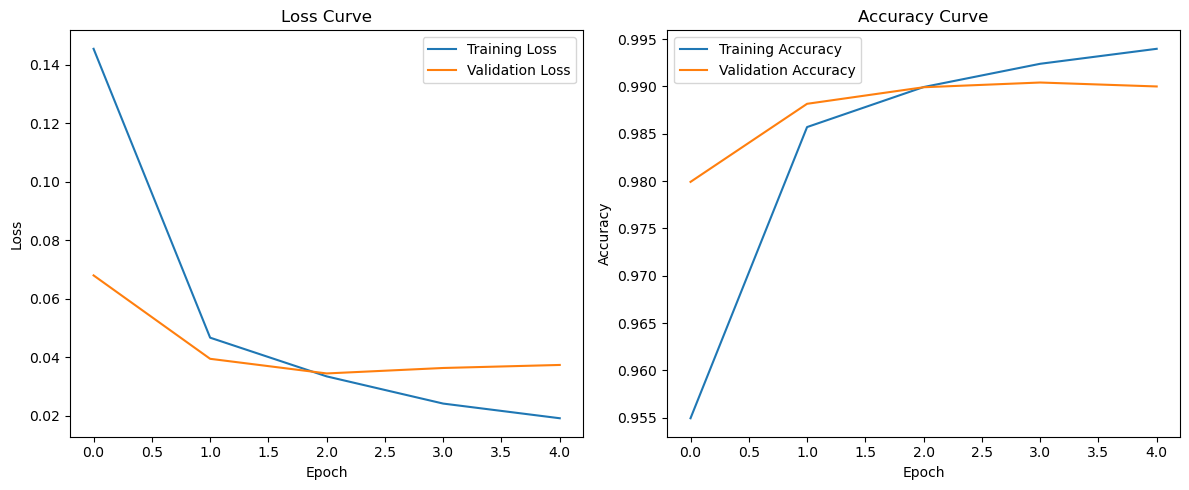

Fold 2:
Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0119 - val_accuracy: 0.9962
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0150 - val_accuracy: 0.9957
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0227 - val_accuracy: 0.9936
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0200 - val_accuracy: 0.9944
Epoch 5/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0236 - val_accuracy: 0.9943
Validation Loss: 0.0236, Validation Accuracy: 0.9943
375/375 [==============================] - 1s 2ms/step


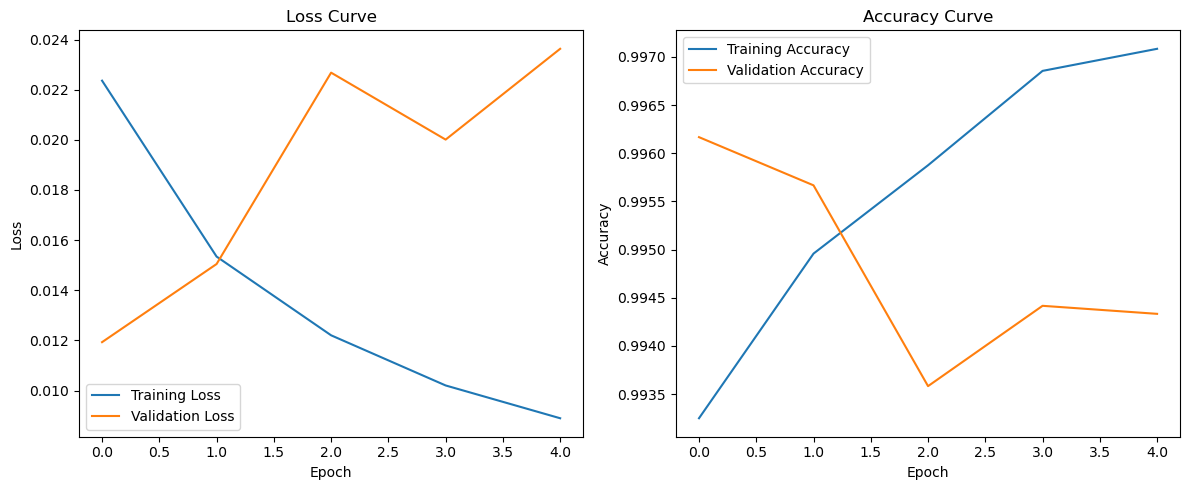

Fold 3:
Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0076 - val_accuracy: 0.9973
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0069 - val_accuracy: 0.9979
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0138 - val_accuracy: 0.9962
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0253 - val_accuracy: 0.9935
Validation Loss: 0.0253, Validation Accuracy: 0.9935
375/375 [==============================] - 1s 3ms/step


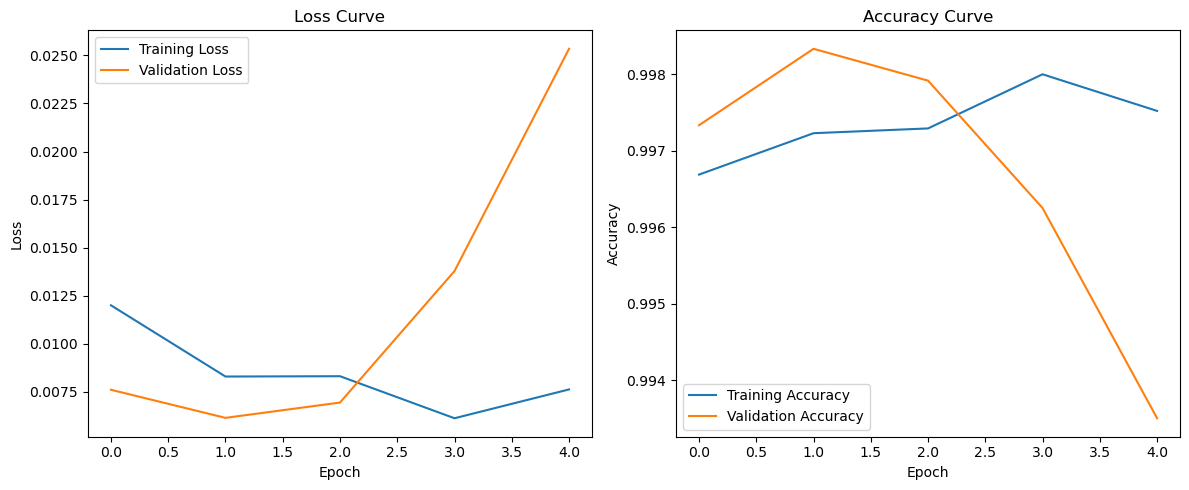

Fold 4:
Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0038 - val_accuracy: 0.9988
Epoch 2/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0063 - val_accuracy: 0.9975
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0038 - val_accuracy: 0.9985
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0077 - val_accuracy: 0.9974
Epoch 5/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0127 - val_accuracy: 0.9965
Validation Loss: 0.0127, Validation Accuracy: 0.9965
375/375 [==============================] - 1s 3ms/step


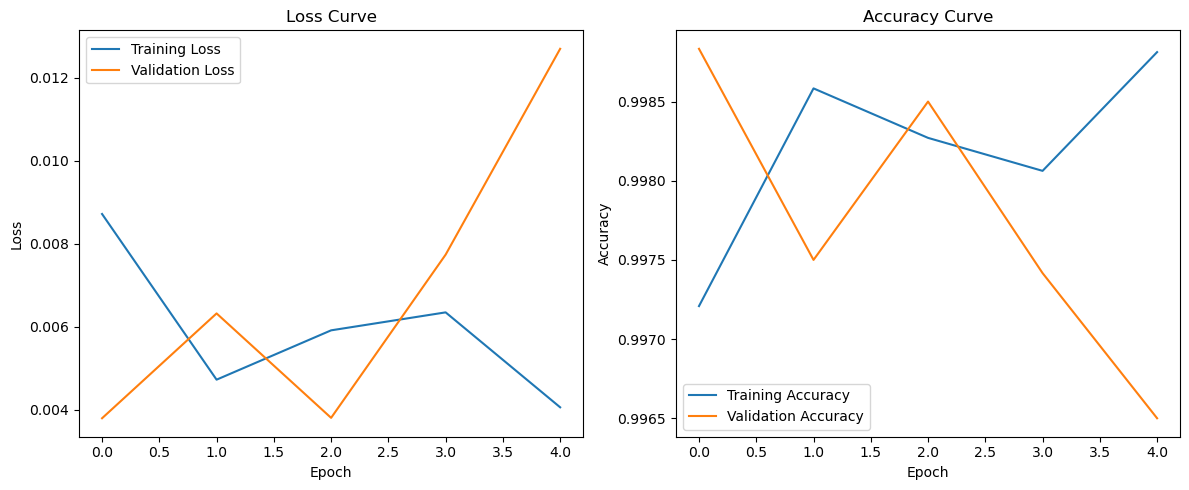

Fold 5:
Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0070 - val_accuracy: 0.9979
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0071 - val_accuracy: 0.9985
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0132 - val_accuracy: 0.9972
Validation Loss: 0.0132, Validation Accuracy: 0.9972
375/375 [==============================] - 1s 3ms/step


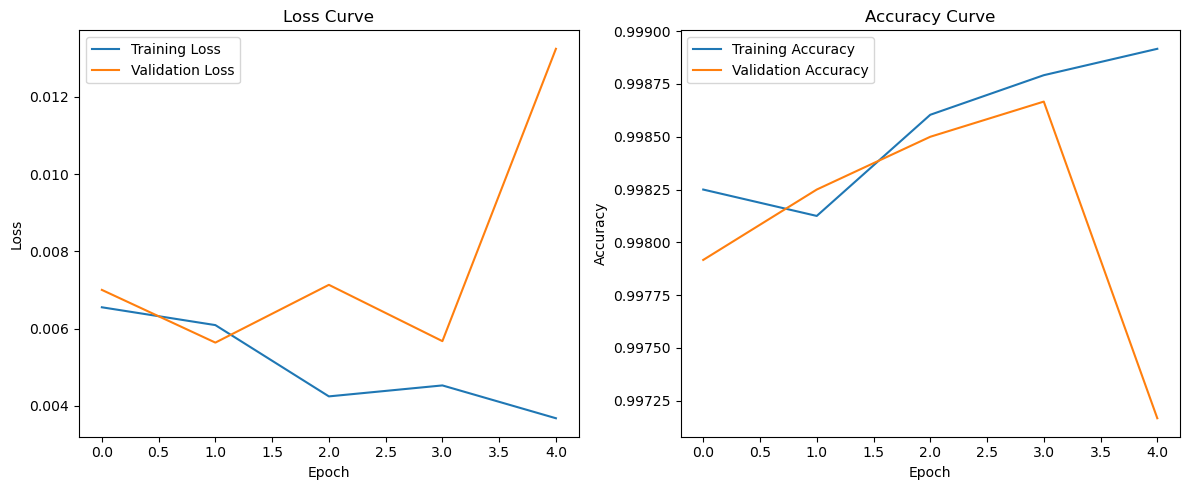

In [10]:
for fold, (train_index, val_index) in enumerate(kfold.split(X_train), 1):
    print(f"Fold {fold}:")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)
    histories.append(history)
    
    # Evaluate the model on validation data
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    fold_accuracies.append(val_accuracy)
    
    # Predictions for confusion matrix
    y_pred = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    conf_matrices.append(conf_matrix)

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

Calculate average accuracy across all folds

In [11]:
avg_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Validation Accuracy Across Folds: {avg_accuracy:.4f}")


Average Validation Accuracy Across Folds: 0.9943


 Average confusion matrix across folds

In [12]:
avg_conf_matrix = np.mean(conf_matrices, axis=0)

Plot confusion matrix

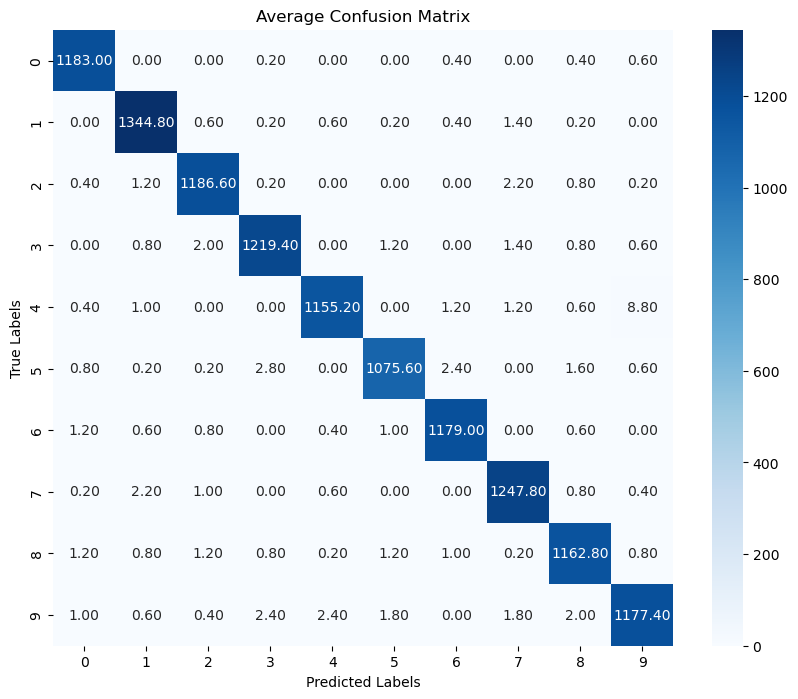

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Confusion Matrix')
plt.show()